# Metodo Kohonen
### Entrenamiento
Primero entrenamos el conjunto y obtenemos la red

In [22]:
import numpy as np
from get_data import data, raw_data
from Neuron import Neuron
#Paso Inicial: Inicializo valores

k = 3
p = len(raw_data)
labels = raw_data.columns[1:]
countries = raw_data.values[:,0]
n = data.shape[1]

def update_eta(old_eta):
  return old_eta * 1

def update_radius(old_radius):
  return old_radius * 1

def set_init_weights():
  w = []
  for _ in range(0,k*k):
    i = np.random.randint(len(data))
    wi = data[i]
    w.append(wi)
  return np.array(w)

weights = set_init_weights()
grid = np.empty((k,k), Neuron)

index = 0
for i in range(k):
    for j in range(k):
        grid[i][j] = Neuron(weights[index],0,(i,j))
        index += 1

def update_neighborhood_weight(radius, w_k):
  umbral = weights[w_k]
  res = []
  for i in range(len(weights)):
    if i != w_k and np.linalg.norm(weights[i] - umbral) < radius:
      res.append(i)
  return np.array(res)

init_learn_rate = 0.3
init_radius = 2
max_epochs = 500 * k * k

  #Paso Inicial
radius = init_radius
eta = init_learn_rate
t = 1
cut = False
#Paso t
while t < max_epochs and not cut:
  #Paso 1: Selecciono un registro de entrada Xp
  x_index = np.random.choice(range(data.shape[0]))
  x = data[x_index]
  
  #Paso 2: Encontrar la neurona ganadora
  aux = []
  for row in grid:
    for neu in row:
        aux.append(np.linalg.norm(x-neu.weights))
  aux = np.array(aux)
  w_k = np.argmin(aux)
  
  #Paso 3: Actualizar los pesos de las neuronas vecinas
  n_k = update_neighborhood_weight(radius,w_k)
  
  index = 0
  for i in range(k):
    for j in range(k):
        if (j in n_k):
          weights[index] = weights[index] + eta * (x-weights[index])
          grid[i][j].weights = weights[index]
        index += 1
          
  radius = update_radius(radius)
  eta = update_eta(eta)
  t += 1

# for i in range(k):
#   for j in range(k):
#     print('i: ', i, 'j: ', j, ' ', grid[i][j].weights, '\n')


### Visualizacion y analisis
Luego observamos y analizamos los datos obtenidos

In [23]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

values = np.zeros((k,k), int)
index = 0
for entrie in data:
    min_position = (None,None)
    min_dist = 999
    for row in grid:
        for col in row:
            w = col.weights
            dist = np.linalg.norm(entrie-w)
            if dist < min_dist:
                min_position = col.position
                min_dist = dist
    grid[min_position[0], min_position[1]].count += 1
    grid[min_position[0], min_position[1]].add_element(countries[index])
    values[min_position[0], min_position[1]] += 1
    index += 1


## Vemos que pais tiene cada neurona

In [24]:
i = 0
for col in grid:
    for j in range(len(col)):
        print('Neurona (',i,',',j,') tiene a: ', grid[i][j].elements)
    i += 1

Neurona ( 0 , 0 ) tiene a:  []
Neurona ( 0 , 1 ) tiene a:  []
Neurona ( 0 , 2 ) tiene a:  ['Austria' 'Belgium' 'Bulgaria' 'Croatia' 'Czech Republic' 'Denmark'
 'Estonia' 'Greece' 'Hungary' 'Iceland' 'Ireland' 'Latvia' 'Lithuania'
 'Luxembourg' 'Netherlands' 'Portugal' 'Slovakia' 'Slovenia' 'Switzerland']
Neurona ( 0 , 3 ) tiene a:  ['Finland' 'Germany' 'Italy' 'Norway' 'Poland' 'Spain' 'Sweden' 'Ukraine'
 'United Kingdom']
Neurona ( 0 , 4 ) tiene a:  []
Neurona ( 1 , 0 ) tiene a:  []
Neurona ( 1 , 1 ) tiene a:  []
Neurona ( 1 , 2 ) tiene a:  []
Neurona ( 1 , 3 ) tiene a:  []
Neurona ( 1 , 4 ) tiene a:  []
Neurona ( 2 , 0 ) tiene a:  []
Neurona ( 2 , 1 ) tiene a:  []
Neurona ( 2 , 2 ) tiene a:  []
Neurona ( 2 , 3 ) tiene a:  []
Neurona ( 2 , 4 ) tiene a:  []
Neurona ( 3 , 0 ) tiene a:  []
Neurona ( 3 , 1 ) tiene a:  []
Neurona ( 3 , 2 ) tiene a:  []
Neurona ( 3 , 3 ) tiene a:  []
Neurona ( 3 , 4 ) tiene a:  []
Neurona ( 4 , 0 ) tiene a:  []
Neurona ( 4 , 1 ) tiene a:  []
Neurona ( 4 , 2

## Lo comparamos en un heat map

<AxesSubplot:>

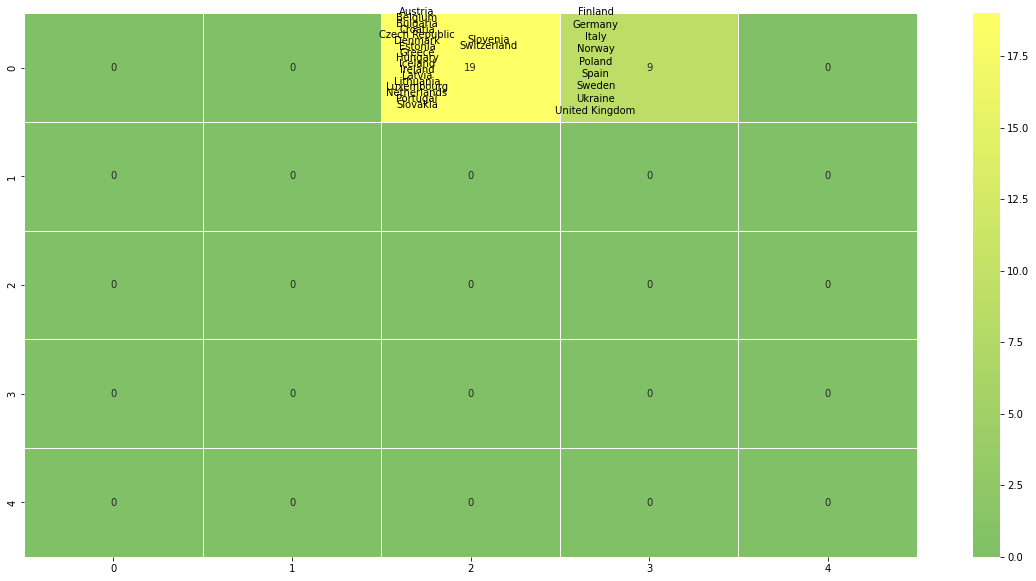

In [25]:
fig, ax = plt.subplots(figsize=(20,10))

for col in grid:
  for neuron in col:
    i, j = neuron.position[0], neuron.position[1]
    step = 1 / (len(neuron.elements) - 0.2) if len(neuron.elements) > 0 else 0
    i = 0.4 if len(neuron.elements) == 1 else i
    for e in neuron.elements:
      text = ax.text(j + 0.2,i-0.01, e,
                       ha="center", va="center", color="#000")
      if i > 0.8:
        j += 0.4
        i = 0.2
      i += step
sns.heatmap(values, annot=True, center=0, ax=ax, cmap='summer',linewidths=.5)


## Matriz U

<AxesSubplot:>

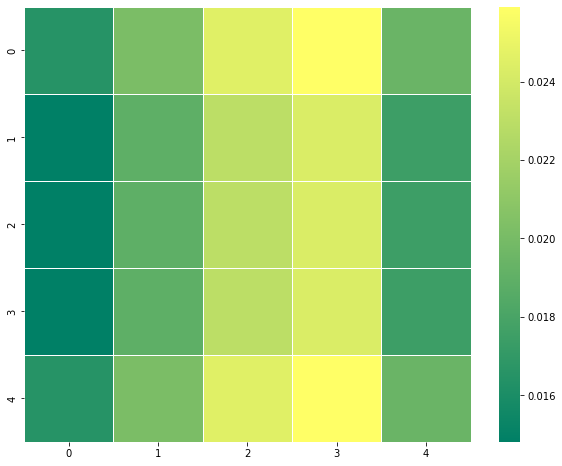

In [26]:
u_values = np.zeros((k,k),float)

def get_neighbors(i,j):
  return [(i,j+1), (i+1,j), (i+1,j+1), (i,j-1), (i-1,j), (i-1,j-1), (i-1, j+1), (i+1, j-1)]

for i in range(k):
  for j in range(k):
    w = grid[i,j].weights
    neighbors = get_neighbors(i,j)
    true_neighbors = 0
    distances = []
    for n in neighbors:
      x, y = n[0], n[1]
      if x >= 0 and y >= 0 and x < k and y < k:
        neighbor_neuron_w = grid[x,y].weights
        dist = np.linalg.norm(w - neighbor_neuron_w)
        distances.append(dist)
        true_neighbors += 1
    u_values[i][j] = (sum(distances)/true_neighbors)
    
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(u_values,cmap='summer',linewidths=.5, ax=ax )